# Application - *correction*

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas
  
# fetch dataset 
adult = fetch_ucirepo(id = 2)
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

y = y.assign(income = y.income.str.replace(".", ""))

## Nettoyage des données

- Supprimer les lignes avec données manquantes
- Supprimer les colonnes `fnlwgt`, `education-num` et `native-country`
- Encoder en *ont-hot* les variables `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`
- Binariser les variables `capital-gain` et `capital-loss`

### Suppression des données manquantes

In [2]:
X1 = X.dropna()
y1 = y.iloc[X1.index]

In [3]:
X2 = X1.reset_index()
y2 = y1.reset_index()

### Suppression des colonnes inutiles

In [4]:
X3 = X2.drop(columns = ["fnlwgt", "education-num", "native-country"])

### Encoder en *one-hot*

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

liste = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex"]
X4 = X3.drop(columns = liste)

for v in liste:
    enc = encoder.fit(X3[[v]])
    enc_df = pandas.DataFrame(enc.transform(X3[[v]]).toarray(), columns = [v+":"+str(c) for c in enc.categories_[0]])
    X4 = pandas.concat([X4, enc_df], axis = 1)

X4

,index,age,capital-gain,capital-loss,hours-per-week,workclass:?,workclass:Federal-gov,workclass:Local-gov,workclass:Never-worked,workclass:Private,...,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Amer-Indian-Eskimo,race:Asian-Pac-Islander,race:Black,race:Other,race:White,sex:Female,sex:Male
0,0,39,2174,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,50,0,0,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,38,0,0,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,53,0,0,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,28,0,0,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47616,48836,33,0,0,40,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
47617,48837,39,0,0,36,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
47618,48839,38,0,0,50,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
47619,48840,44,5455,0,40,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Binariser les variables `capital-gain` et `capital-loss`

In [6]:
X5 = X4.assign(capital_gain = (X4["capital-gain"] > 0)) \
    .assign(capital_loss = (X4["capital-loss"] > 0)) \
    .drop(columns = ["capital-gain", "capital-loss"])
X5

,index,age,hours-per-week,workclass:?,workclass:Federal-gov,workclass:Local-gov,workclass:Never-worked,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,...,relationship:Wife,race:Amer-Indian-Eskimo,race:Asian-Pac-Islander,race:Black,race:Other,race:White,sex:Female,sex:Male,capital_gain,capital_loss
0,0,39,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,True,False
1,1,50,13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,False,False
2,2,38,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,False,False
3,3,53,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,False,False
4,4,28,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47616,48836,33,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,False,False
47617,48837,39,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,False,False
47618,48839,38,50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,False,False
47619,48840,44,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,True,False


## Création de 2 jeux de données

In [8]:
X_train = X5.sample(frac = .75)
X_test = X5.drop(X_train.index)
y_train = y2.iloc[X_train.index]
y_test = y2.iloc[X_test.index]

## Modélisation

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

### Régression logisitique

In [10]:
m_log = LogisticRegression(max_iter = 10000).fit(X_train, y_train.income)

#### Résultats sur `train`

In [11]:
pandas.crosstab(m_log.predict(X_train), y_train.income)

income,<=50K,>50K
row_0,,
<=50K,25011,4125
>50K,2051,4529


In [12]:
m_log.score(X_train, y_train.income)

0.827080300145593

#### Résultats sur `test`

In [13]:
pandas.crosstab(m_log.predict(X_test), y_test.income)

income,<=50K,>50K
row_0,,
<=50K,8350,1361
>50K,668,1526


In [14]:
m_log.score(X_test, y_test.income)

0.829567408651827

### $k$ plus proches voisins

In [15]:
r2_train = []
r2_test = []

k_val = (1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50)
for k in k_val:
    m_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.income)
    r2_train = r2_train + [m_knn.score(X_train, y_train.income)]
    r2_test  = r2_test  + [m_knn.score(X_test,  y_test.income)]
    
df = pandas.DataFrame({
    "variable": k_val,
    "r2 train": r2_train,
    "r2 test": r2_test
})
df

,variable,r2 train,r2 test
0,1,1.000000,0.680974
1,2,0.840156,0.737085
2,3,0.841500,0.708694
3,4,0.806445,0.737169
4,5,0.807789,0.716086
5,10,0.775647,0.746745
6,15,0.769319,0.747669
7,20,0.761955,0.755901
8,25,0.760723,0.755061
9,30,0.758484,0.756825


In [16]:
m_knn = KNeighborsClassifier(n_neighbors = 20).fit(X_train, y_train.income)

#### Résultats sur `train`

In [17]:
pandas.crosstab(m_knn.predict(X_train), y_train.income)

income,<=50K,>50K
row_0,,
<=50K,26836,8276
>50K,226,378


In [18]:
m_knn.score(X_train, y_train.income)

0.7619554261395453

#### Résultats sur `test`

In [19]:
pandas.crosstab(m_knn.predict(X_test), y_test.income)

income,<=50K,>50K
row_0,,
<=50K,8925,2813
>50K,93,74


In [20]:
m_knn.score(X_test, y_test.income)

0.7559008819823604

### CART

In [21]:
m_tree = DecisionTreeClassifier().fit(X_train, y_train.income)

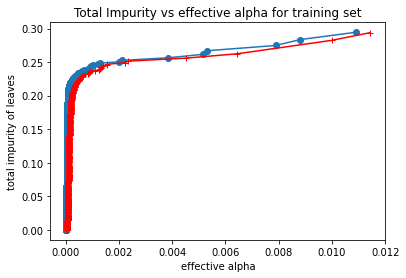

In [22]:
import matplotlib.pyplot as plt

pruning_train = m_tree.cost_complexity_pruning_path(X_train, y_train.income)
pruning_test  = m_tree.cost_complexity_pruning_path(X_test, y_test.income)

fig, ax = plt.subplots()
ax.plot(pruning_train.ccp_alphas[:-1], pruning_train.impurities[:-1], marker="o")
ax.plot(pruning_test.ccp_alphas[:-1], pruning_test.impurities[:-1], marker="+", color="red")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

#### Liste des arbres et performances sur les données `train` et `test`

In [23]:
clfs = []
for ccp_alpha in pruning_train.ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train.income)
    clfs.append(clf)

In [24]:
clfs = clfs[:-1]

In [25]:
train_scores = [clf.score(X_train, y_train.income) for clf in clfs]
test_scores = [clf.score(X_test, y_test.income) for clf in clfs]

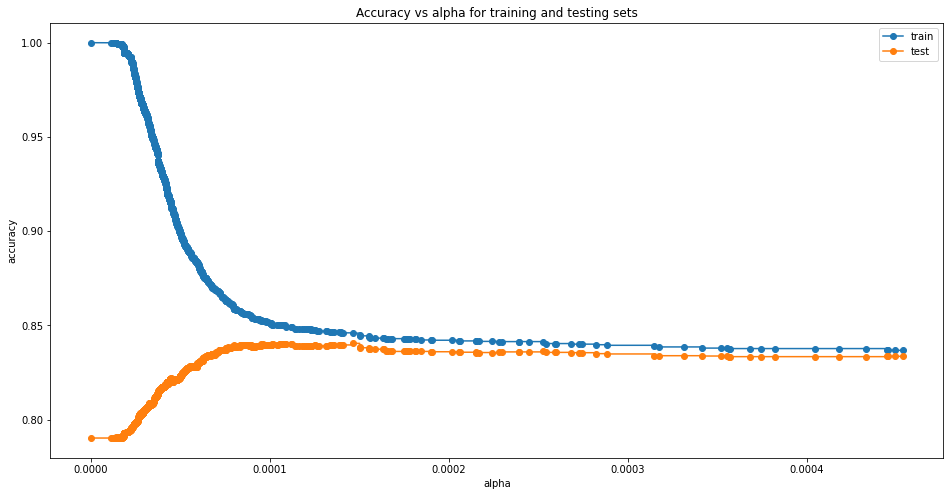

In [28]:
max = 2220
fig, ax = plt.subplots(figsize = (16, 8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(pruning_train.ccp_alphas[:max], train_scores[:max], marker="o", label="train", drawstyle="steps-post")
ax.plot(pruning_train.ccp_alphas[:max], test_scores[:max], marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [29]:
m_tree_elague = DecisionTreeClassifier(ccp_alpha=0.0001).fit(X_train, y_train.income)

#### Résultats sur `train`

In [30]:
pandas.crosstab(m_tree_elague.predict(X_train), y_train.income)

income,<=50K,>50K
row_0,,
<=50K,25196,3435
>50K,1866,5219


In [31]:
m_tree_elague.score(X_train, y_train.income)

0.8515791242020383

#### Résultats sur `test`

In [32]:
pandas.crosstab(m_tree_elague.predict(X_test), y_test.income)

income,<=50K,>50K
row_0,,
<=50K,8304,1196
>50K,714,1691


In [33]:
m_tree_elague.score(X_test, y_test.income)

0.8395632087358252

### MLP

In [34]:
r2_train = []
auc_train = []
r2_test = []
auc_test = []

layers = ((), (10), (20), (50), (100), (10, 10), (20, 20), (50, 50), (100, 100), 
          (10, 10, 10), (20, 20, 20), (50, 50, 50), (100, 100, 100))
for l in layers:
    m_mlp = MLPClassifier(hidden_layer_sizes = l, max_iter = 1000).fit(X_train, y_train.income)
    r2_train = r2_train + [m_mlp.score(X_train, y_train.income)]
    fpr, tpr, th = roc_curve(y_train.income == ">50K", pandas.DataFrame(m_mlp.predict_proba(X_train))[1])
    auc_train = auc_train + [auc(fpr, tpr)]
    r2_test = r2_test + [m_mlp.score(X_test, y_test.income)]
    fpr, tpr, th = roc_curve(y_test.income == ">50K", pandas.DataFrame(m_mlp.predict_proba(X_test))[1])
    auc_test = auc_test + [auc(fpr, tpr)]
    
df = pandas.DataFrame({
    "layers": layers,
    "r2 train": r2_train,
    "auc train": auc_train,
    "r2 test": r2_test,
    "auc test": auc_test
})
df

,layers,r2 train,auc train,r2 test,auc test
0,(),0.810701,0.867847,0.813440,0.871726
1,10,0.745464,0.874478,0.746913,0.872416
2,20,0.830216,0.882596,0.832087,0.885295
3,50,0.810981,0.850719,0.811844,0.854664
4,100,0.790542,0.801826,0.792356,0.806826
5,"(10, 10)",0.822265,0.890230,0.822596,0.889723
6,"(20, 20)",0.785054,0.774700,0.783200,0.780088
7,"(50, 50)",0.678435,0.867787,0.674591,0.864453
8,"(100, 100)",0.793034,0.812108,0.792608,0.815430
9,"(10, 10, 10)",0.804989,0.849931,0.807728,0.854184


In [46]:
m_mlp = MLPClassifier(hidden_layer_sizes = (10, 10), max_iter = 1000).fit(X_train, y_train.income)

#### Résultats sur `train`

In [47]:
pandas.crosstab(m_mlp.predict(X_train), y_train.income)

income,<=50K,>50K
row_0,,
<=50K,25070,3887
>50K,1992,4767


In [48]:
m_mlp.score(X_train, y_train.income)

0.8353959009967522

#### Résultats sur `test`

In [49]:
pandas.crosstab(m_mlp.predict(X_test), y_test.income)

income,<=50K,>50K
row_0,,
<=50K,8363,1289
>50K,655,1598


In [50]:
m_mlp.score(X_test, y_test.income)

0.8367072658546829

## Comparaison des modèles entre eux

#### Résultats sur `train`

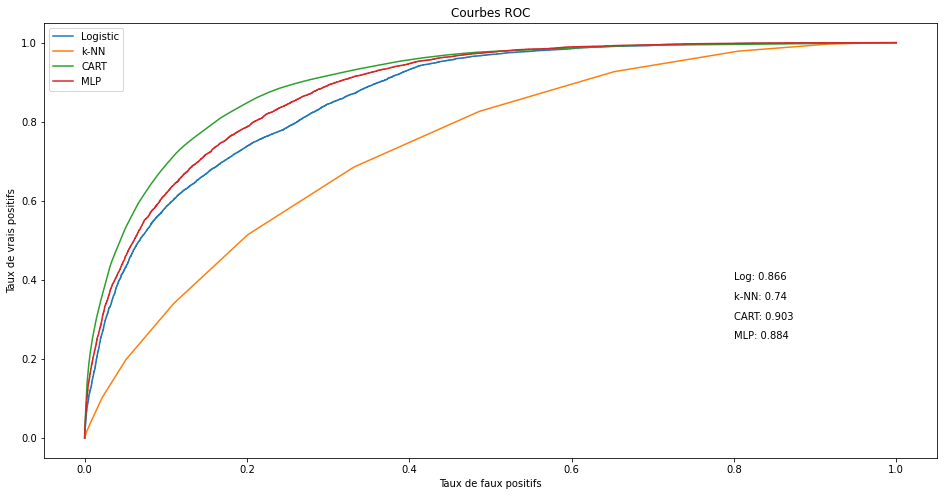

In [51]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 1, 1)
plt.title("Courbes ROC")

# Logistic
fpr, tpr, th = roc_curve(y_train.income == ">50K", pandas.DataFrame(m_log.predict_proba(X_train))[1])
ax.plot(fpr, tpr, label='Logistic')
ax.text(.8, .4, "Log: " + str(round(auc(fpr, tpr), 3)))

# kNN
fpr, tpr, th = roc_curve(y_train.income == ">50K", pandas.DataFrame(m_knn.predict_proba(X_train))[1])
ax.plot(fpr, tpr, label='k-NN')
ax.text(.8, .35, "k-NN: " + str(round(auc(fpr, tpr), 3)))

# CART
fpr, tpr, th = roc_curve(y_train.income == ">50K", pandas.DataFrame(m_tree_elague.predict_proba(X_train))[1])
ax.plot(fpr, tpr, label='CART')
ax.text(.8, .3, "CART: " + str(round(auc(fpr, tpr), 3)))

# MLP
fpr, tpr, th = roc_curve(y_train.income == ">50K", pandas.DataFrame(m_mlp.predict_proba(X_train))[1])
ax.plot(fpr, tpr, label='MLP')
ax.text(.8, .25, "MLP: " + str(round(auc(fpr, tpr), 3)))

ax.legend()
ax.set(xlabel = "Taux de faux positifs", ylabel = "Taux de vrais positifs")
plt.show()

#### Résultats sur `test`

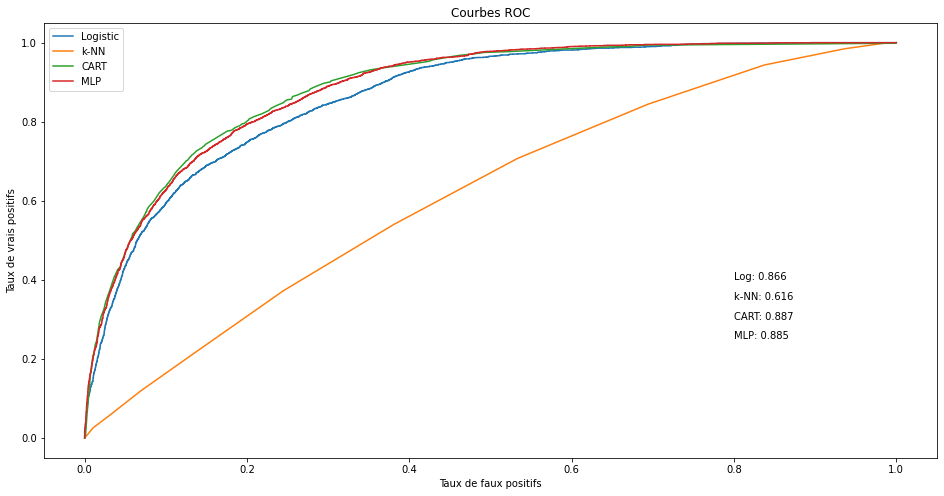

In [52]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 1, 1)
plt.title("Courbes ROC")

# Logistic
fpr, tpr, th = roc_curve(y_test.income == ">50K", pandas.DataFrame(m_log.predict_proba(X_test))[1])
ax.plot(fpr, tpr, label='Logistic')
ax.text(.8, .4, "Log: " + str(round(auc(fpr, tpr), 3)))

# kNN
fpr, tpr, th = roc_curve(y_test.income == ">50K", pandas.DataFrame(m_knn.predict_proba(X_test))[1])
ax.plot(fpr, tpr, label='k-NN')
ax.text(.8, .35, "k-NN: " + str(round(auc(fpr, tpr), 3)))

# CART
fpr, tpr, th = roc_curve(y_test.income == ">50K", pandas.DataFrame(m_tree_elague.predict_proba(X_test))[1])
ax.plot(fpr, tpr, label='CART')
ax.text(.8, .3, "CART: " + str(round(auc(fpr, tpr), 3)))

# MLP
fpr, tpr, th = roc_curve(y_test.income == ">50K", pandas.DataFrame(m_mlp.predict_proba(X_test))[1])
ax.plot(fpr, tpr, label='MLP')
ax.text(.8, .25, "MLP: " + str(round(auc(fpr, tpr), 3)))

ax.legend()
ax.set(xlabel = "Taux de faux positifs", ylabel = "Taux de vrais positifs")
plt.show()